<h1><center>Statistics final exam DSBA</center></h1>

In [1]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance
%matplotlib inline

In [106]:
data = pd.read_csv('sxof_data.csv', sep=";") # open raw data file

<h3><center>Let us look at the data</center></h3>

In [107]:
data

,id,region,sex,age,income,isMarried,nchildren,religious,education,occupation,rate_marriage,naffairs
0,1,3,1,37,"563680,0625",1,0,3,18,5,4,0
1,2,1,0,27,"270797,5938",0,0,4,14,1,1,0
2,3,3,0,32,"365333,3438",0,1,1,12,1,1,0
3,4,1,1,57,"563680,0625",1,1,5,18,1,5,0
4,5,2,1,22,"253485,5938",0,0,2,17,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
596,597,2,1,22,"148468,375",1,1,1,12,5,5,1
597,598,2,0,32,122240,0,1,2,18,1,1,7
598,599,1,1,32,"276105,2188",1,1,2,17,5,5,2
599,600,1,1,22,"340067,1875",1,1,3,18,4,2,2


<h3> Here we created new variable to store data and checked if there any null values. Fortunatelly, there are not any of them. </h3>

In [108]:
df = data

In [109]:
df.isnull().values.any()

False

<h3><center>Preprocess data to work with it in future</center></h3>

In [110]:
df["income"] = df["income"].str.replace(',', '.')

In [111]:
df["income"] = pd.to_numeric(df["income"])

<h1><center>Problem 1</center></h1>
<h3><center>a) You are proposed to study the problem set - done</center>
<center>b) Test the null hypothesis that income has normal distribution</center>
<center>c) Test the null hypothesis that income has log-normal distribution</center></h3>

In [112]:
income = df["income"].to_list()

In [113]:
k2, p = stats.normaltest(income)

Set the significance level

In [114]:
alpha = 1e-3
print(alpha)

0.001


In [115]:
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


<h3><center>Thus, there is a strong evidence to reject the null hypothesis and make conclusion that distribution is not normal.</center></h3>

For item с) I will use Kolmogorov-Smirnov test

In [116]:
p = stats.kstest(income, "lognorm", stats.lognorm.fit(income))[1]

In [117]:
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


<h3><center>Thus, there is a strong evidence to reject the null hypothesis and make conclusion that distribution is not log-normal.</center></h3>

<center><h1>Problem 2</h1>
<h3>a) Does the proportion of female households vary among various regions?</h3></center>

In [134]:
print("Moscow - " + "{:.2f}".format(100 * (len(df.loc[(df["sex"] == 1) & (df["region"] == 1)])
                                    / len(df.loc[df["region"] == 1]))) + "%")

print("Tver - " + "{:.2f}".format(100 * (len(df.loc[(df["sex"] == 1) & (df["region"] == 2)])
                                    / len(df.loc[df["region"] == 2]))) + "%")

print("Pskov - " + "{:.2f}".format(100 * (len(df.loc[(df["sex"] == 1) & (df["region"] == 3)])
                                    / len(df.loc[df["region"] == 3]))) + "%")

Moscow - 50.25%
Tver - 45.88%
Pskov - 46.57%


<h3><center>
    
    H0 - means of female households between regions are equal
    
    H1 - at least two means of female households between regions differ
</center></h3>

In [146]:
reg1_f = len(df.loc[(df["sex"] == 1) & (df["region"] == 1)])
reg2_f = len(df.loc[(df["sex"] == 1) & (df["region"] == 2)])
reg3_f = len(df.loc[(df["sex"] == 1) & (df["region"] == 3)])
reg1_m = len(df.loc[(df["sex"] == 0) & (df["region"] == 1)])
reg2_m = len(df.loc[(df["sex"] == 0) & (df["region"] == 2)])
reg3_m = len(df.loc[(df["sex"] == 0) & (df["region"] == 3)])

In [151]:
obs = np.array([[reg1_f, reg1_m], [reg2_f, reg2_m], [reg3_f, reg3_m]])
print(obs)

[[102 101]
 [ 89 105]
 [ 95 109]]


In [149]:
g, p, dof, expctd = chi2_contingency(obs)

In [166]:
print(str(p) + " > 0.05, then we cannot reject H0 hypothesis.\
 There is a strong evidence that proportions of female households do not significantly differ among these regions.")

0.6414553979577649 > 0.05, then we cannot reject H0 hypothesis. There is a strong evidence that proportions of female households do not significantly differ among these regions.


<center><h3>b) Is number of children associated with regions?</h3></center>

<h3><center>
    
    H0 - no, there is not an association
    
    H1 - yes, there is
</center></h3>

Let's look at the contingency table:

In [169]:
table = pd.crosstab(df["nchildren"], df["region"])
table

region,1,2,3
nchildren,,,
0,59,59,53
1,144,135,151


In [178]:
p = stats.chi2_contingency(table)[1] #doing test for association
alpha = 0.05

In [179]:
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis cannot be rejected


Therefore, we make a conclusion, that there is not association between regions and number of children.

<center><h3>c) Are religious preferences associated with regions?</h3></center>

<h3><center>
    
    H0 - no, there is not association
    
    H1 - yes, there is
</center></h3>

Let's look at the contingency table:

In [181]:
table = pd.crosstab(df["religious"], df["region"])
table

region,1,2,3
religious,,,
1,13,15,20
2,53,56,55
3,47,36,46
4,69,62,59
5,21,25,24


In [182]:
p = stats.chi2_contingency(table)[1] #doing test for association
alpha = 0.05
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis cannot be rejected


Therefore, we make a conclusion, that there is not association between regions and religion.

<center><h3>d) Is occupation associated with regions?</h3></center>

<h3><center>
    
    H0 - no, there is not an association
    
    H1 - yes, there is
</center></h3>

Let's look at the contingency table:

In [183]:
table = pd.crosstab(df["occupation"], df["region"])
table

region,1,2,3
occupation,,,
1,44,28,41
2,34,52,56
3,46,39,32
4,33,35,29
5,46,40,46


In [184]:
p = stats.chi2_contingency(table)[1] #doing test for association
alpha = 0.05
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis cannot be rejected


There is evedince that there is not association between regions and occupation

<center><h3>h) Please test any hypothesis you are interested in</h3></center>

<h3><center>
    
    H0 - no, there is not an association between sex and education
    
    H1 - yes, there is an association between sex and education
</center></h3>

Let's look at the contingency table:

In [189]:
table = pd.crosstab(df["sex"], df["education"])
table

education,9,12,14,16,17,18,20
sex,,,,,,,
0,4,36,106,70,52,45,2
1,3,8,48,45,37,67,78


In [192]:
p = stats.chi2_contingency(table)[1] #doing test for association
alpha = 0.05
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


We make conclusion that there is an association between sex and length of education

<center><h3>f) Is the significant difference between the income of men and women? Please redo this
analysis separately by regions. </h3></center>

<h3><center>
    
    H0 - average income is the same for men and women
    
    H1 - no, average income differes for men and women
</center></h3>

Let's make assumption that variances are equal in population

In [196]:
income_male = df.loc[df['sex'] == 0].income.tolist()
income_female = df.loc[df['sex'] == 1].income.tolist()

In [200]:
p = stats.ttest_ind(income_male, income_female)[1]

In [201]:
alpha = 0.05
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis cannot be rejected


Therefore there is an evidence that difference between the income of men and women is not significant, in general.

Let's redo this for different regions:

In [206]:
income_male = df.loc[(df['sex'] == 0) & (df['region'] == 1)].income.tolist()
income_female = df.loc[(df['sex'] == 1) & (df['region'] == 1)].income.tolist()
p = stats.ttest_ind(income_male, income_female)[1]
alpha = 0.05
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis cannot be rejected


In [204]:
income_male = df.loc[(df['sex'] == 0) & (df['region'] == 2)].income.tolist()
income_female = df.loc[(df['sex'] == 1) & (df['region'] == 2)].income.tolist()

p = stats.ttest_ind(income_male, income_female)[1]
alpha = 0.05
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis cannot be rejected


In [205]:
income_male = df.loc[(df['sex'] == 0) & (df['region'] == 3)].income.tolist()
income_female = df.loc[(df['sex'] == 1) & (df['region'] == 3)].income.tolist()

p = stats.ttest_ind(income_male, income_female)[1]
alpha = 0.05
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis cannot be rejected


We make a conclusion that there is not significant difference between income of men and women among all given regions.

<center><h3>g) Is the significant difference between the ln(income) of men and women? Please redo this
analysis separately by regions. </h3></center>

<h3><center>
    
    H0 - average income is the same for men and women
    
    H1 - no, average income differes for men and women
</center></h3>

Let's make assumption that variances are equal in population

In [207]:
income_male = df.loc[df['sex'] == 0].income.to_numpy()
income_female = df.loc[df['sex'] == 1].income.to_numpy()

In [211]:
income_male = np.log(income_male)
income_female = np.log(income_female)

In [212]:
p = stats.ttest_ind(income_male, income_female)[1]
alpha = 0.05
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


There is evidence that there is a significant difference between ln(income) of mew and women. However, probably it is not very impornant for real life since people do not earn ln(income).

<center><h3>Please estimate a linear regression model you are interested in. </h3></center>

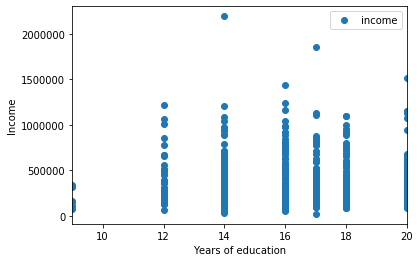

In [215]:
df.plot(x='education', y='income', style='o')   
plt.xlabel('Years of education')  
plt.ylabel('Income')  
plt.show()

In [217]:
X = df["education"].values.reshape(-1,1)
y = df["income"].values.reshape(-1,1)

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [229]:
y_pred = regressor.predict(X_test)

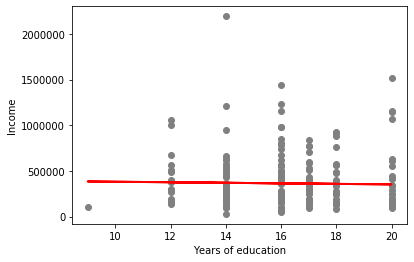

In [231]:
plt.scatter(X_test, y_test,  color='gray')
plt.xlabel('Years of education')  
plt.ylabel('Income') 
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

We can see that the line has downward trend. Probably such trend is because there are less people, who study for more years and most people still earn average salary. It also maybe because people, who sudy less, have more time to work and get promotions faster.

<center><h1>Problem 3</h1>
<h3>a) Test the claim that on average the income at Moscow is greater than at Tver.</h3></center>

<h3><center>
    
    H0 - average income is the same for Moscow and Tver
    
    H1 - average income is bigger for Moscow, than for Tver
</center></h3>

In [232]:
income_mos = df.loc[df['region'] == 1].income.tolist()
income_tver = df.loc[df['region'] == 2].income.tolist()

In [240]:
t, p = stats.ttest_ind(income_mos, income_tver)
print(t)

-0.8502292975903151


In [239]:
p = np.round(stats.t.cdf(t, df=600), 3)
alpha = 0.05
print(p)

0.198


In [241]:
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis cannot be rejected


Due to the results of the test, we can make conclusion that there is not difference for average income of Moscow and Tver.

<h3><center> b) You noticed that a number of Python developers is 4 times greater than a number of data
analysts. Please test this belief. </center></h3>

<h3><center>
    
    H0 - observed == expected number of workers
    
    H1 - observed != expected number of workers
</center></h3>

In [242]:
data_analysts = len(df.loc[df["occupation"] == 2])
python_worker = len(df.loc[df["occupation"] == 3])

In [244]:
obs = [data_analysts, python_worker]
exp = [data_analysts, python_worker * 4]

In [246]:
p = stats.chisquare(obs, exp)[1]

In [248]:
alpha = 0.05
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


Therefore, we make a conclusion, that there will not be a 4 times more python workers, than data analysts in general population.

<h3><center> e) Please divide the income into 4 intervals of the same length. Is the distribution of income
similar within various occupations areas. </center></h3>

In [249]:
df["income_rank"] = pd.qcut(df.income, [0, .25, .5, .75, 1.], labels=[1, 2, 3, 4])

In [251]:
table = pd.crosstab(df["income_rank"], df["occupation"])

Let's look at the contingency table:

In [252]:
table

occupation,1,2,3,4,5
income_rank,,,,,
1,30,39,27,31,24
2,34,31,32,27,26
3,29,37,26,22,36
4,20,35,32,17,46


<h3><center>
    
    H0 - distribution of income is similar in all groups
    
    H1 - distribution is different at least in two groups
</center></h3>

In [254]:
p = stats.chi2_contingency(table)[1]

In [257]:
alpha = 0.1
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


In [258]:
alpha = 0.05
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis cannot be rejected


We see that at alpha = 0.1 we can reject H0 hypothesis and concude that distribution of income differs between groups. At alpha = 0.05, we cannot reject the H0 hypothesis and conclude that there is similar distribution of income in all groups. For alpha=0.1 probability of making type1 error is error, so I'll stick to 0.05 hypothesis and will conclude that distribution of salaries might be similar in all groups.

<h3><center> Now, that is the end of my work, thank you for reading this notebook. </center></h3>